In [19]:
# Script computes eddy fluxes in plain perpendicular to coastline

In [20]:
from netCDF4 import Dataset
import os
import numpy as np
import matplotlib.pyplot as plt
import decomp_alllevels as deco
from imp import reload
import write_netCDF as write
import amoc_plots as aplot
import tools
import xz_tools as xz_tools
import numpy.ma as ma
from scipy.interpolate import interp1d
import matplotlib.colors as mplc
import matplotlib.colors as colors

## Choose case and then change directory to there...

In [21]:
reload(tools)

<module 'tools' from '/home/mpim/m300522/mod_data/tools.py'>

In [22]:
########### CHOOSE CASE #########
case="10S"
#################################

########### CHOOSE TIME #########
time="2000s"
#################################

path=tools.case_path(case,time)
os.chdir(path)

## Load data and grid needed for streamfunction 

In [23]:
wrho = tools.netread_data('../wrho_eddy_stripe.nc','wrho_eddy') # wrho_eddy
divUrho = tools.netread_data("../div_Urho_eddy_stripe.nc","div_Urho_eddy") # eddy flux divergence
U_grad_rho = tools.netread_data("../U_grad_rho_stripe.nc","mean_advection_rho") # mean density advection
vke = tools.netread_data('../vke_p_stripe.nc','vke') # vke
uko = tools.netread_data('../uko_p_stripe.nc','uko') # vke
rho = tools.netread_data('../rhopoto_stripe.nc','rhopoto') # density
lat,lon,depth = tools.netread_grid('../rhopoto_stripe.nc','lat','lon','depth_14')
nx = tools.netread_data('../dxN_vel_hor_mag_stripe.nc','dx_vel_hor_mag') # normal vector x-comp
ny = tools.netread_data('../dyN_vel_hor_mag_stripe.nc','dy_vel_hor_mag') # normal vector y-comp
Pe2Pm_hor = tools.netread_data('../Pe2Pm_hor_stripe.nc','Pe2Pm') # conversion eddy to mean Pot energy
EKE_full = tools.netread_data('../EKE_full_stripe.nc','EKE_full')
dx_urho_eddy = tools.netread_data('../dx_urho_eddy_stripe.nc', 'dx_urho_eddy')
dy_vrho_eddy = tools.netread_data('../dy_vrho_eddy_stripe.nc', 'dy_vrho_eddy')
dz_wrho_eddy = tools.netread_data('../dz_wrho_eddy_stripe.nc', 'dz_wrho_eddy')
rhorho_eddy = tools.netread_data('../rhorho_eddy_stripe.nc','rhorho_eddy')


ztop 	= 800.
zbot	= 3100.

ktop,kbot,k2k = tools.depths_xz_sections(ztop,zbot,depth)

lx,rx,llon,rlon= tools.case_region(case)

lat2 = lat[:,lx:rx]
lon2 = lon[:,lx:rx]
#urho_eddy2 = urho_eddy[:,:,lx:rx]
#vrho_eddy2 = vrho_eddy[:,:,lx:rx]
wrho2 = wrho[:,:,lx:rx]
vke2 = vke[:,:,lx:rx]
uko2 = uko[:,:,lx:rx]
rho2 = rho[:,:,lx:rx]
divUrho2 = divUrho[:,:,lx:rx]
nx2 = 1*nx[:,:,lx:rx]
ny2 = 1*ny[:,:,lx:rx]
U_grad_rho2 = 1*U_grad_rho[:,:,lx:rx]
Pe2Pm_hor2 = 1*Pe2Pm_hor[:,:,lx:rx]
EKE_full2 = 1*EKE_full[:,:,lx:rx]
dx_urho_eddy2 = 1*dx_urho_eddy[:,:,lx:rx]
dy_vrho_eddy2 = 1*dy_vrho_eddy[:,:,lx:rx]
dz_wrho_eddy2 = 1*dz_wrho_eddy[:,:,lx:rx]
rhorho_eddy2 = 1*rhorho_eddy[:,:,lx:rx]

llon2 = llon-lx
rlon2 = llon-lx + (rlon -llon)

dist = np.zeros((lon[0,llon:rlon].shape))
for i in range(len(dist)):
    dist[i] = i * 11.113
    # Get distance from coast from lon:

x,z = np.meshgrid(dist,depth[ktop:kbot])
clines2,maxpos = tools.clines_from_uko_vke(kbot,ktop,k2k,uko,uko2,vke2)

/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5-linux-x86_64.egg/numpy/ma/core.py:6457: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


## Get normals and decomposition

In [24]:
normal, tangent = deco.read_normal_get_tangent(nx2,ny2,clines2,k2k)
upar,uper,minimalj = deco.decomposition_little_sophisticated(uko2,vke2,tangent,normal,lon2,lat2,clines2,ktop,kbot)

/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5-linux-x86_64.egg/numpy/ma/core.py:3158: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  dout = self.data[indx]
/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5-linux-x86_64.egg/numpy/ma/core.py:3174: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  elif _mask is not nomask and _mask[indx]:


In [25]:
print(np.min(lat),np.max(lat))

-15.2518311897 -9.28846593835


In [26]:
reload(xz_tools)

<module 'xz_tools' from '/home/mpim/m300522/mod_data/xz_tools.py'>

In [37]:
#reload(xz_tools)
lat_from = -10
lat_to = -15
save = 0

#mean_upar,data_upar = xz_tools.along_average(upar,upar,ktop,kbot,k2k,llon2,rlon2,maxpos,lat2,lat_from,lat_to)
#mean_divUrho,data_divUrho = xz_tools.along_average(upar,divUrho2,ktop,kbot,k2k,llon2,rlon2,maxpos,lat2,lat_from,lat_to)
#mean_rho,data_rho = xz_tools.along_average(upar,rho2,ktop,kbot,k2k,llon2,rlon2,maxpos,lat2,lat_from,lat_to)
#mean_U_grad_rho,data_U_grad_rho = xz_tools.along_average(upar,U_grad_rho2,ktop,kbot,k2k,llon2,rlon2,maxpos,lat2,lat_from,lat_to)
#mean_vke,data_vke = xz_tools.along_average(upar,vke2,ktop,kbot,k2k,llon2,rlon2,maxpos,lat2,lat_from,lat_to)
#mean_wrho,data_wrho = xz_tools.along_average(upar,wrho2,ktop,kbot,k2k,llon2,rlon2,maxpos,lat2,lat_from,lat_to)
#mean_Pe2Pm_hor,data_Pe2Pm_hor = xz_tools.along_average(upar,Pe2Pm_hor2,ktop,kbot,k2k,llon2,rlon2,maxpos,lat2,lat_from,lat_to)
#mean_EKE_full,data_EKE_full = xz_tools.along_average(upar,EKE_full2,ktop,kbot,k2k,llon2,rlon2,maxpos,lat2,lat_from,lat_to)
#mean_dy_vrho_eddy,data_dy_vrho_eddy = xz_tools.along_average(upar,dy_vrho_eddy2,ktop,kbot,k2k,llon2,rlon2,maxpos,lat2,lat_from,lat_to)
#mean_dx_urho_eddy,data_dx_urho_eddy = xz_tools.along_average(upar,dx_urho_eddy2,ktop,kbot,k2k,llon2,rlon2,maxpos,lat2,lat_from,lat_to)
#mean_dz_wrho_eddy,data_dz_wrho_eddy = xz_tools.along_average(upar,dz_wrho_eddy2,ktop,kbot,k2k,llon2,rlon2,maxpos,lat2,lat_from,lat_to)

mean_upar,data_upar = xz_tools.along_average_dd(uko2,vke2,upar,ktop,kbot,k2k,llon2,rlon2,maxpos,lat2,lat_from,lat_to)
mean_divUrho,data_divUrho = xz_tools.along_average_dd(uko2,vke2,divUrho2,ktop,kbot,k2k,llon2,rlon2,maxpos,lat2,lat_from,lat_to)
mean_rho,data_rho = xz_tools.along_average_dd(uko2,vke2,rho2,ktop,kbot,k2k,llon2,rlon2,maxpos,lat2,lat_from,lat_to)
mean_U_grad_rho,data_U_grad_rho = xz_tools.along_average_dd(uko2,vke2,U_grad_rho2,ktop,kbot,k2k,llon2,rlon2,maxpos,lat2,lat_from,lat_to)
mean_vke,data_vke = xz_tools.along_average_dd(uko2,vke2,vke2,ktop,kbot,k2k,llon2,rlon2,maxpos,lat2,lat_from,lat_to)
mean_wrho,data_wrho = xz_tools.along_average_dd(uko2,vke2,wrho2,ktop,kbot,k2k,llon2,rlon2,maxpos,lat2,lat_from,lat_to)
mean_Pe2Pm_hor,data_Pe2Pm_hor = xz_tools.along_average_dd(uko2,vke2,Pe2Pm_hor2,ktop,kbot,k2k,llon2,rlon2,maxpos,lat2,lat_from,lat_to)
mean_EKE_full,data_EKE_full = xz_tools.along_average_dd(uko2,vke2,EKE_full2,ktop,kbot,k2k,llon2,rlon2,maxpos,lat2,lat_from,lat_to)
mean_dy_vrho_eddy,data_dy_vrho_eddy = xz_tools.along_average_dd(uko2,vke2,dy_vrho_eddy2,ktop,kbot,k2k,llon2,rlon2,maxpos,lat2,lat_from,lat_to)
mean_dx_urho_eddy,data_dx_urho_eddy = xz_tools.along_average_dd(uko2,vke2,dx_urho_eddy2,ktop,kbot,k2k,llon2,rlon2,maxpos,lat2,lat_from,lat_to)
mean_dz_wrho_eddy,data_dz_wrho_eddy = xz_tools.along_average_dd(uko2,vke2,dz_wrho_eddy2,ktop,kbot,k2k,llon2,rlon2,maxpos,lat2,lat_from,lat_to)
mean_rhorho_eddy,data_rhorho_eddy = xz_tools.along_average_dd(uko2,vke2,rhorho_eddy2,ktop,kbot,k2k,llon2,rlon2,maxpos,lat2,lat_from,lat_to)


data_rho_ = data_rho.copy()
data_rho  = np.ma.masked_where(data_rho == 0, data_rho_,copy=True)

data_upar = tools.mask_according_to(data_rho,data_upar)
data_divUrho = tools.mask_according_to(data_rho,data_divUrho)
data_Pe2Pm_hor = tools.mask_according_to(data_rho,data_Pe2Pm_hor)
data_EKE_full = tools.mask_according_to(data_rho,data_EKE_full)
data_wrho = tools.mask_according_to(data_upar,data_wrho)
data_U_grad_rho = tools.mask_according_to(data_rho,data_U_grad_rho)
data_dx_urho_eddy = tools.mask_according_to(data_rho,data_dx_urho_eddy)
data_dy_vrho_eddy = tools.mask_according_to(data_rho,data_dy_vrho_eddy)
data_dz_wrho_eddy = tools.mask_according_to(data_rho,data_dz_wrho_eddy)




/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5-linux-x86_64.egg/numpy/ma/core.py:6457: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


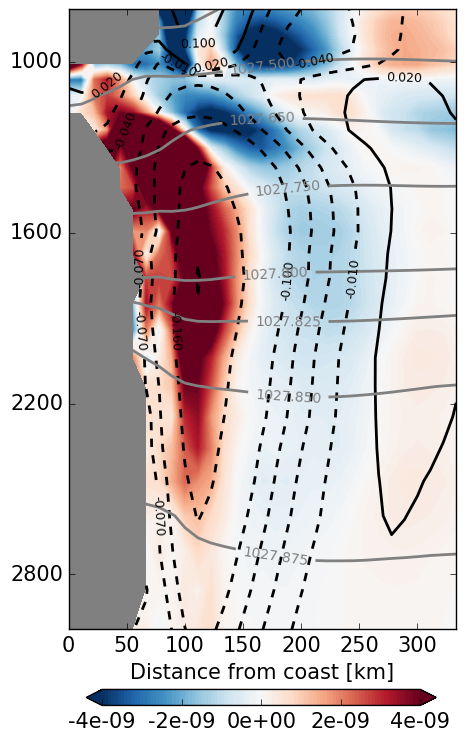

In [38]:
fig = plt.figure(figsize=(5,8))
#fig.suptitle("Latitude " + str(lat_from) + " to " + str( lat_to ),fontsize=15)
ax1 = fig.add_subplot(1,1,1)
#ax2 = fig.add_subplot(1,1,1)
#ax3 = fig.add_subplot(1,3,3)

high=4e-9
v =  np.linspace(-high,high,100)
plt.yticks((-1000,-1600,-2200,-2800),(1000,1600,2200,2800),fontsize=15)
plt.xticks(fontsize=15)
tools.plot_rho_upar(ax1,x,z,data_upar,data_rho,'Ugradrho',"left")
fdat1=ax1.contourf(x,-z,data_U_grad_rho,v,extend="both",cmap='RdBu_r')
#tools.plot_colorbar_single(fig,ax1,fdat1)


#tools.plot_rho_upar(ax2,x,z,data_upar,data_rho,'divUrho',"center")
#fdat2=ax2.contourf(x,-z,data_divUrho,v,extend="both",cmap='RdBu_r')

#tools.plot_rho_upar(ax3,x,z,data_upar,data_rho,'Residual','right')
#fdat3=ax3.contourf(x,-z,data_U_grad_rho+data_divUrho,v,extend="both",cmap='RdBu_r')

tools.plot_colorbar_all(fig,ax2,fdat2)

if save == 1:
    plt.savefig("/work/mh0256/m300522/data_storm/eddies/2000s/figs/divUrho/Ugradrho"+str(np.int64(lat_from))+"to"+str(np.int64(lat_to))+".png",bbox_inches = 'tight')


plt.show()

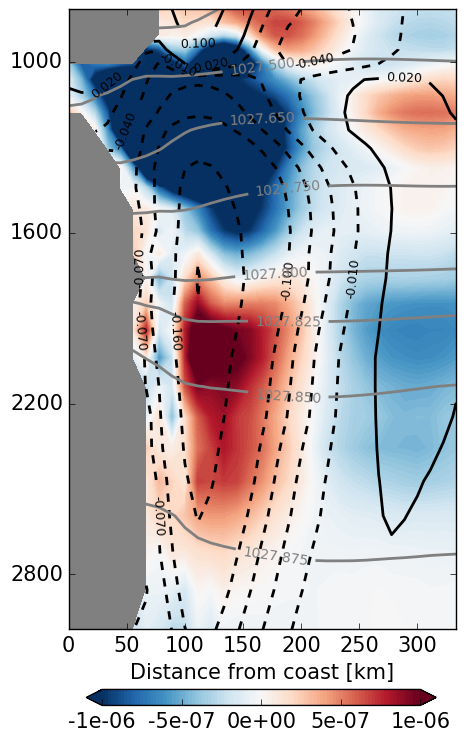

In [39]:
fig = plt.figure(figsize=(5,8))
#fig.suptitle("Latitude " + str(lat_from) + " to " + str( lat_to ),fontsize=15)
ax1 = fig.add_subplot(1,1,1)
#ax2 = fig.add_subplot(1,1,1)
#ax3 = fig.add_subplot(1,3,3)

high=1e-6
v =  np.linspace(-high,high,100)

plt.yticks((-1000,-1600,-2200,-2800),(1000,1600,2200,2800),fontsize=15)
plt.xticks(fontsize=15)
tools.plot_rho_upar(ax1,x,z,data_upar,data_rho,'Pe2Pm','left')
fdat1=ax1.contourf(x,-z,data_Pe2Pm_hor,v,extend="both",cmap='RdBu_r')
tools.plot_colorbar_all(fig,ax1,fdat1)


#tools.plot_rho_upar(ax2,x,z,data_upar,data_rho,'wrho_eddy','center')
#fdat2=ax2.contourf(x,-z,9.81*data_wrho,v,extend="both",cmap='RdBu_r')
#tools.plot_colorbar_all(fig,ax2,fdat2)


#tools.plot_rho_upar(ax3,x,z,data_upar,data_rho,'EKE','right')
#w = np.linspace(0,1.5e-2,20)
#fdat3=ax3.contourf(x,-z,data_EKE_full,20,cmap='Blues',extend="both")
#tools.plot_colorbar_single(fig,ax3,fdat3)
save=1
if save == 1:
    plt.savefig("/work/mh0256/m300522/data_storm/eddies/2000s/figs/divUrho/Pe2Pm"+str(np.int64(lat_from))+"to"+str(np.int64(lat_to))+".png",bbox_inches = 'tight')


plt.show()

In [31]:
fig = plt.figure(figsize=(12,8))
fig.suptitle("Latitude " + str(lat_from) + " to " + str( lat_to ),fontsize=15)
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

high=5e-9
v =  np.linspace(-high,high,100)

tools.plot_rho_upar(ax1,x,z,data_upar,data_rho,'dx_urho_eddy')
fdat1=ax1.contourf(x,-z,data_dx_urho_eddy,v,extend="both",cmap='RdBu_r')

tools.plot_rho_upar(ax2,x,z,data_upar,data_rho,'dy_vrho_eddy')
fdat2=ax2.contourf(x,-z,data_dy_vrho_eddy,v,extend="both",cmap='RdBu_r')

tools.plot_rho_upar(ax3,x,z,data_upar,data_rho,'dz_wrho_eddy')
fdat3=ax3.contourf(x,-z,data_dz_wrho_eddy,v,extend="both",cmap='RdBu_r')

tools.plot_colorbar_all(fig,ax1,fdat1)

if save == 1:
    plt.savefig("/work/mh0256/m300522/data_storm/eddies/2000s/figs/divUrho/divergence_components"+str(np.int64(lat_from))+"to"+str(np.int64(lat_to))+".png",bbox_inches = 'tight')


plt.show()

TypeError: plot_rho_upar() missing 1 required positional argument: 'pos'

In [ ]:
fig = plt.figure(figsize=(4,8))
fig.suptitle("Latitude " + str(lat_from) + " to " + str( lat_to ),fontsize=15)
ax1 = fig.add_subplot(1,1,1)

tools.plot_rho_upar(ax1,x,z,data_upar,data_rho,'Density Variance')
fdat1=ax1.contourf(x,-z,data_rhorho_eddy,20,extend="both",cmap='RdBu_r')
tools.plot_colorbar_single(fig,ax1,fdat1)

#plt.savefig("/work/mh0256/m300522/data_storm/eddies/2000s/figs/divUrho/density_variance"+str(np.int64(lat_from))+"to"+str(np.int64(lat_to))+".png",bbox_inches = 'tight')


plt.show()